In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib

# 한글 깨짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
import matplotlib.pyplot as plt

# 인코딩
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# 다중공산성 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats import outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.max_columns = None

from tqdm import tqdm
import time

import seaborn as sns
import matplotlib.font_manager as fm
path = 'C:/Users/ghkdw/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname = path, size = 18)

In [2]:
pe1= pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/창원인구.csv",
                     encoding = 'cp949')
pe1

,시점,행정구역별(읍면동),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2015,창원시,총인구(명),1059241,49130,48803,52406,68797,71951,66887,80264,82066,90233,97050,95599,86604,59311,39554,28854,21232,12796,7704
1,2016,창원시,총인구(명),1053551,47775,49350,49108,64784,70787,66747,75030,83568,85236,97093,92186,91681,64718,42281,28607,22393,13866,8341
2,2017,창원시,총인구(명),1045559,44494,49479,48405,60019,68200,66596,69621,84377,82194,95883,90178,94401,68585,45403,29727,23978,14730,9289
3,2018,창원시,총인구(명),1044215,42086,49236,48140,56326,66448,67437,66406,84758,79425,93772,91228,95755,73446,47354,31797,24982,15602,10017
4,2019,창원시,총인구(명),1036862,38710,48870,47413,52454,63555,67092,64059,81522,77937,91460,93877,93999,78139,50332,34246,25641,16572,10984
5,2020,창원시,총인구(명),1029389,35002,48589,48038,47937,61409,66399,61887,76084,79357,87618,94050,91535,82607,56336,36879,25876,17553,12233
6,2021,창원시,총인구(명),1025702,31767,47474,49148,45286,57768,65629,62188,71305,81807,83453,95004,88555,87538,61484,39564,25822,18512,13398


In [3]:
pe1 = pe1.drop(['행정구역별(읍면동)', '항목'], axis = 1) 

In [4]:
pe1

,시점,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2015,1059241,49130,48803,52406,68797,71951,66887,80264,82066,90233,97050,95599,86604,59311,39554,28854,21232,12796,7704
1,2016,1053551,47775,49350,49108,64784,70787,66747,75030,83568,85236,97093,92186,91681,64718,42281,28607,22393,13866,8341
2,2017,1045559,44494,49479,48405,60019,68200,66596,69621,84377,82194,95883,90178,94401,68585,45403,29727,23978,14730,9289
3,2018,1044215,42086,49236,48140,56326,66448,67437,66406,84758,79425,93772,91228,95755,73446,47354,31797,24982,15602,10017
4,2019,1036862,38710,48870,47413,52454,63555,67092,64059,81522,77937,91460,93877,93999,78139,50332,34246,25641,16572,10984
5,2020,1029389,35002,48589,48038,47937,61409,66399,61887,76084,79357,87618,94050,91535,82607,56336,36879,25876,17553,12233
6,2021,1025702,31767,47474,49148,45286,57768,65629,62188,71305,81807,83453,95004,88555,87538,61484,39564,25822,18512,13398


In [5]:
from matplotlib import font_manager,rc

In [6]:
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font',family = font_name) #한글 폰트 설정

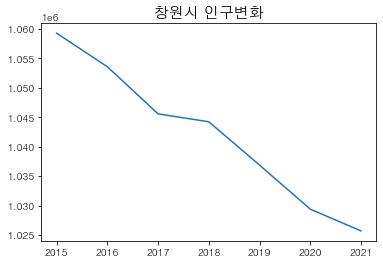

In [7]:
plt.plot(pe1['시점'], pe1['합계'])
plt.title('창원시 인구변화', fontsize = 15)
plt.show()

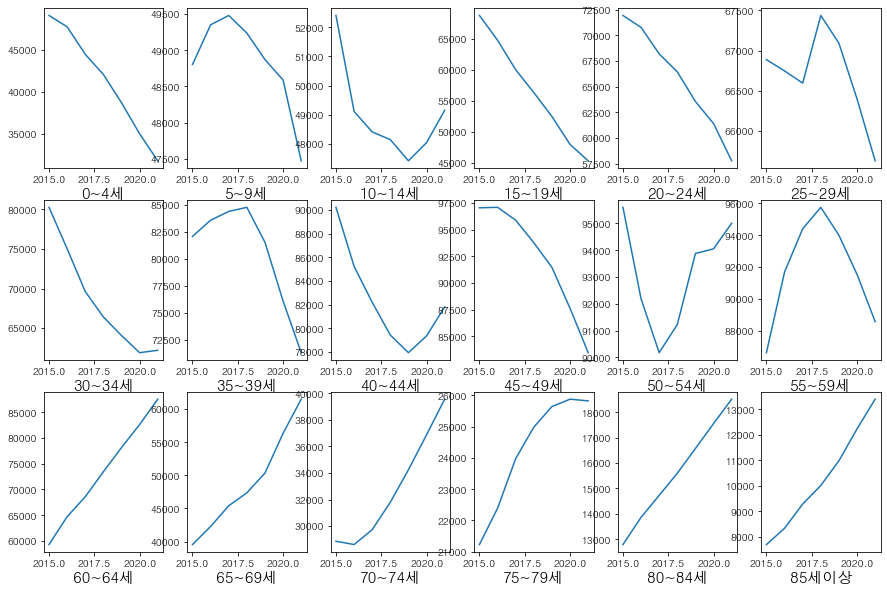

In [8]:
#창원시 전체 인구변화와 각 구 인구 변화를 시각화
f, axes = plt.subplots(3, 6)
f.set_size_inches(15, 10)
axes[0, 0].plot(pe1['시점'], pe1['0~4세'])
axes[0, 0].set_xlabel('0~4세', fontsize = 15)
axes[0, 1].plot(pe1['시점'], pe1['5~9세'])
axes[0, 1].set_xlabel('5~9세', fontsize = 15)
axes[0, 2].plot(pe1['시점'], pe1['10~14세'])
axes[0, 2].set_xlabel('10~14세', fontsize = 15)
axes[0, 3].plot(pe1['시점'], pe1['15~19세'])
axes[0, 3].set_xlabel('15~19세', fontsize = 15)
axes[0, 4].plot(pe1['시점'], pe1['20~24세'])
axes[0, 4].set_xlabel('20~24세', fontsize = 15)
axes[0, 5].plot(pe1['시점'], pe1['25~29세'])
axes[0, 5].set_xlabel('25~29세', fontsize = 15)
axes[1, 0].plot(pe1['시점'], pe1['30~34세'])
axes[1, 0].set_xlabel('30~34세', fontsize = 15)
axes[1, 1].plot(pe1['시점'], pe1['35~39세'])
axes[1, 1].set_xlabel('35~39세', fontsize = 15)
axes[1, 2].plot(pe1['시점'], pe1['40~44세'])
axes[1, 2].set_xlabel('40~44세', fontsize = 15)
axes[1, 3].plot(pe1['시점'], pe1['45~49세'])
axes[1, 3].set_xlabel('45~49세', fontsize = 15)
axes[1, 4].plot(pe1['시점'], pe1['50~54세'])
axes[1, 4].set_xlabel('50~54세', fontsize = 15)
axes[1, 5].plot(pe1['시점'], pe1['55~59세'])
axes[1, 5].set_xlabel('55~59세', fontsize = 15)
axes[2, 0].plot(pe1['시점'], pe1['60~64세'])
axes[2, 0].set_xlabel('60~64세', fontsize = 15)
axes[2, 1].plot(pe1['시점'], pe1['65~69세'])
axes[2, 1].set_xlabel('65~69세', fontsize = 15)
axes[2, 2].plot(pe1['시점'], pe1['70~74세'])
axes[2, 2].set_xlabel('70~74세', fontsize = 15)
axes[2, 3].plot(pe1['시점'], pe1['75~79세'])
axes[2, 3].set_xlabel('75~79세', fontsize = 15)
axes[2, 4].plot(pe1['시점'], pe1['80~84세'])
axes[2, 4].set_xlabel('80~84세', fontsize = 15)
axes[2, 5].plot(pe1['시점'], pe1['85세이상'])
axes[2, 5].set_xlabel('85세이상', fontsize = 15)
plt.show()

In [9]:
pe = pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/연령_및_성별_인구__읍면동_2015_2020___시군구_20162019__20220715144507.csv",
                     encoding = 'cp949')
pe

,시점,행정구역별(읍면동),항목,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2015,의창구,총인구(명),11507,10707,11719,17859,20215,16727,19434,18863,21031,24833,24618,21023,13415,8303,5896,4423,2894,1733
1,2016,의창구,총인구(명),10903,10670,10627,16340,19753,16742,17827,18779,19501,24177,23883,22395,14788,8989,5813,4589,3126,1887
2,2017,의창구,총인구(명),10379,10934,10341,14942,19112,17132,16488,19409,18675,23661,23522,23591,15957,9861,6075,4967,3321,2193
3,2018,의창구,총인구(명),10117,11166,10430,13758,18456,17488,15933,19899,18043,22893,23905,24291,17389,10463,6554,5259,3491,2396
4,2019,의창구,총인구(명),9828,11519,10554,12888,17713,18155,16146,20047,18035,22360,25175,24558,18817,11417,7148,5392,3650,2599
5,2020,의창구,총인구(명),9557,12038,11222,11698,17364,18748,16561,19764,19285,21571,25587,24873,20792,12975,7869,5421,3901,2977


In [10]:
pe = pe.drop(['행정구역별(읍면동)', '항목'], axis = 1)
pe

,시점,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2015,11507,10707,11719,17859,20215,16727,19434,18863,21031,24833,24618,21023,13415,8303,5896,4423,2894,1733
1,2016,10903,10670,10627,16340,19753,16742,17827,18779,19501,24177,23883,22395,14788,8989,5813,4589,3126,1887
2,2017,10379,10934,10341,14942,19112,17132,16488,19409,18675,23661,23522,23591,15957,9861,6075,4967,3321,2193
3,2018,10117,11166,10430,13758,18456,17488,15933,19899,18043,22893,23905,24291,17389,10463,6554,5259,3491,2396
4,2019,9828,11519,10554,12888,17713,18155,16146,20047,18035,22360,25175,24558,18817,11417,7148,5392,3650,2599
5,2020,9557,12038,11222,11698,17364,18748,16561,19764,19285,21571,25587,24873,20792,12975,7869,5421,3901,2977


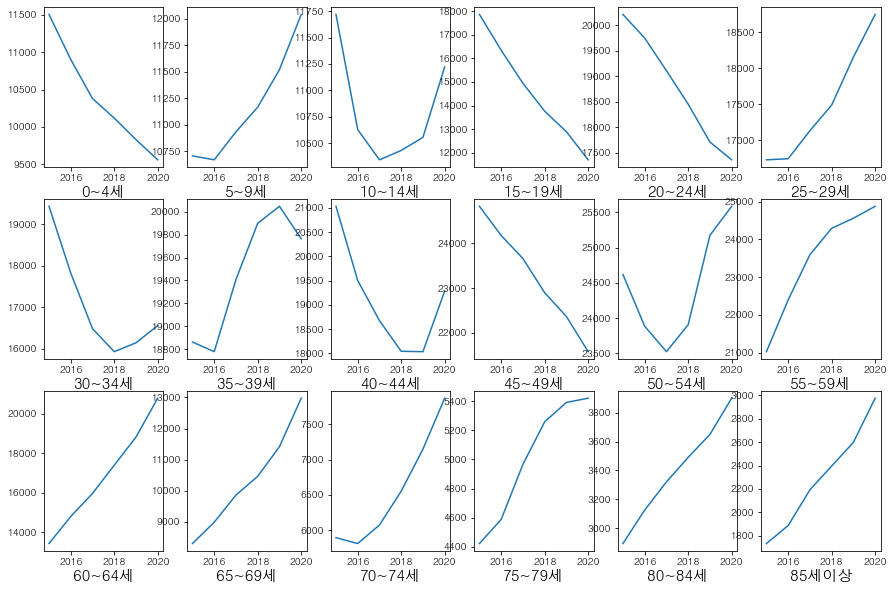

In [11]:
#의창구 연령별 인구 변화를 나타내봄
f, axes = plt.subplots(3, 6)
f.set_size_inches(15, 10)
axes[0, 0].plot(pe['시점'], pe['0~4세'])
axes[0, 0].set_xlabel('0~4세', fontsize = 15)
axes[0, 1].plot(pe['시점'], pe['5~9세'])
axes[0, 1].set_xlabel('5~9세', fontsize = 15)
axes[0, 2].plot(pe['시점'], pe['10~14세'])
axes[0, 2].set_xlabel('10~14세', fontsize = 15)
axes[0, 3].plot(pe['시점'], pe['15~19세'])
axes[0, 3].set_xlabel('15~19세', fontsize = 15)
axes[0, 4].plot(pe['시점'], pe['20~24세'])
axes[0, 4].set_xlabel('20~24세', fontsize = 15)
axes[0, 5].plot(pe['시점'], pe['25~29세'])
axes[0, 5].set_xlabel('25~29세', fontsize = 15)
axes[1, 0].plot(pe['시점'], pe['30~34세'])
axes[1, 0].set_xlabel('30~34세', fontsize = 15)
axes[1, 1].plot(pe['시점'], pe['35~39세'])
axes[1, 1].set_xlabel('35~39세', fontsize = 15)
axes[1, 2].plot(pe['시점'], pe['40~44세'])
axes[1, 2].set_xlabel('40~44세', fontsize = 15)
axes[1, 3].plot(pe['시점'], pe['45~49세'])
axes[1, 3].set_xlabel('45~49세', fontsize = 15)
axes[1, 4].plot(pe['시점'], pe['50~54세'])
axes[1, 4].set_xlabel('50~54세', fontsize = 15)
axes[1, 5].plot(pe['시점'], pe['55~59세'])
axes[1, 5].set_xlabel('55~59세', fontsize = 15)
axes[2, 0].plot(pe['시점'], pe['60~64세'])
axes[2, 0].set_xlabel('60~64세', fontsize = 15)
axes[2, 1].plot(pe['시점'], pe['65~69세'])
axes[2, 1].set_xlabel('65~69세', fontsize = 15)
axes[2, 2].plot(pe['시점'], pe['70~74세'])
axes[2, 2].set_xlabel('70~74세', fontsize = 15)
axes[2, 3].plot(pe['시점'], pe['75~79세'])
axes[2, 3].set_xlabel('75~79세', fontsize = 15)
axes[2, 4].plot(pe['시점'], pe['80~84세'])
axes[2, 4].set_xlabel('80~84세', fontsize = 15)
axes[2, 5].plot(pe['시점'], pe['85세이상'])
axes[2, 5].set_xlabel('85세이상', fontsize = 15)
plt.show()

In [12]:
changwon = pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/명곡동(도계동 명서동 명곡동 서곡동).csv", encoding='cp949')

C:\Users\ghkdw\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
changwon

,순번,대장_종류_0,시군구_명_0,법정동_명_0,대지_구분_0,본번_0,부번_0,도로명주소_도로_명_0,도로명주소_본번_0,도로명주소_부번_0,대지_면적_0,건축_면적_0,건폐율_0,연면적_0,용적율_산정_연면적_0,용적율_0,주_구조_0,주_용도_0,높이_0,지상_층_수_0,지하_층_수_0,주민_구분_2,주민번호_2,변동_원인_2,변동_원인_일_2,층_구분_1,층_번호_1,층_번호_명_1,구조_코드_1,주_용도_1,면적_1
0,1,일반건축물,경상남도 창원시 의창구,북동,대지,34,0,경상남도 창원시 의창구 의안로55번길,24.0,12.0,0.00,45.46,0.0,45.46,45.46,0.00,벽돌구조,단독주택,0.0,1.0,0.0,내국인,3*****************************,소유권이전,19971017,지상,1.0,1층,벽돌구조,단독주택,28.44
1,2,일반건축물,경상남도 창원시 의창구,북동,대지,34,0,경상남도 창원시 의창구 의안로55번길,24.0,12.0,0.00,45.46,0.0,45.46,45.46,0.00,벽돌구조,단독주택,0.0,1.0,0.0,내국인,3*****************************,소유권이전,19971017,지상,1.0,1층,일반목구조,단독주택,17.02
2,3,일반건축물,경상남도 창원시 의창구,북동,대지,35,0,경상남도 창원시 의창구 의안로55번길,24.0,15.0,0.00,42.02,0.0,77.09,77.09,0.00,벽돌구조,단독주택,0.0,2.0,0.0,NaN,5*****************************,소유권이전,19831109,지상,2.0,2층,벽돌구조,단독주택,35.07
3,4,일반건축물,경상남도 창원시 의창구,북동,대지,35,0,경상남도 창원시 의창구 의안로55번길,24.0,15.0,0.00,42.02,0.0,77.09,77.09,0.00,벽돌구조,단독주택,0.0,2.0,0.0,NaN,5*****************************,소유권이전,19831109,지상,1.0,1층,벽돌구조,단독주택,42.02
4,5,일반건축물,경상남도 창원시 의창구,북동,대지,35,1,NaN,NaN,NaN,0.00,57.42,0.0,57.42,57.42,0.00,벽돌구조,단독주택,0.0,1.0,0.0,NaN,NaN,소유권이전,19790319,지상,1.0,1층,블록구조,단독주택,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81579,209338,일반건축물,경상남도 창원시 의창구,명곡동,대지,33,1,경상남도 창원시 의창구 서곡길25번길,30.0,0.0,175.34,95.39,54.4,91.89,91.89,52.41,벽돌구조,단독주택,0.0,1.0,0.0,내국인,6*****************************,소유권이전,20161104,지상,1.0,1층,벽돌구조,단독주택,84.09
81580,209347,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.00,98.93,0.0,195.56,163.19,0.00,벽돌구조,단독주택,0.0,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,블록구조,단독주택,2.00
81581,209348,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.00,98.93,0.0,195.56,163.19,0.00,벽돌구조,단독주택,0.0,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,2.0,2층,벽돌구조,단독주택,64.26
81582,209349,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.00,98.93,0.0,195.56,163.19,0.00,벽돌구조,단독주택,0.0,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,벽돌구조,단독주택,96.93


In [14]:
changwon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81584 entries, 0 to 81583
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   순번            81584 non-null  int64  
 1   대장_종류_0       81584 non-null  object 
 2   시군구_명_0       81584 non-null  object 
 3   법정동_명_0       81584 non-null  object 
 4   대지_구분_0       81584 non-null  object 
 5   본번_0          81584 non-null  int64  
 6   부번_0          81584 non-null  int64  
 7   도로명주소_도로_명_0  79722 non-null  object 
 8   도로명주소_본번_0    79802 non-null  float64
 9   도로명주소_부번_0    64387 non-null  float64
 10  대지_면적_0       80927 non-null  float64
 11  건축_면적_0       81581 non-null  float64
 12  건폐율_0         80923 non-null  float64
 13  연면적_0         81584 non-null  float64
 14  용적율_산정_연면적_0  81574 non-null  float64
 15  용적율_0         80901 non-null  float64
 16  주_구조_0        81572 non-null  object 
 17  주_용도_0        81584 non-null  object 
 18  높이_0          81542 non-nu

In [15]:
changwon1 = changwon.loc[changwon['법정동_명_0'] == '명서동']
changwon1

,순번,대장_종류_0,시군구_명_0,법정동_명_0,대지_구분_0,본번_0,부번_0,도로명주소_도로_명_0,도로명주소_본번_0,도로명주소_부번_0,대지_면적_0,건축_면적_0,건폐율_0,연면적_0,용적율_산정_연면적_0,용적율_0,주_구조_0,주_용도_0,높이_0,지상_층_수_0,지하_층_수_0,주민_구분_2,주민번호_2,변동_원인_2,변동_원인_일_2,층_구분_1,층_번호_1,층_번호_명_1,구조_코드_1,주_용도_1,면적_1
885,886,일반건축물,경상남도 창원시 의창구,명서동,대지,150,17,경상남도 창원시 의창구 명지로104번길,10.0,NaN,243.6,121.71,49.96,235.40,235.40,96.63,벽돌구조,단독주택,8.35,2.0,0.0,내국인,7*****************************,소유권이전,20190524,지상,2.0,2층,벽돌구조,다가구주택,116.29
886,887,일반건축물,경상남도 창원시 의창구,명서동,대지,150,17,경상남도 창원시 의창구 명지로104번길,10.0,NaN,243.6,121.71,49.96,235.40,235.40,96.63,벽돌구조,단독주택,8.35,2.0,0.0,내국인,7*****************************,소유권이전,20190524,지상,1.0,1층,벽돌구조,다가구주택,119.11
958,959,일반건축물,경상남도 창원시 의창구,명서동,대지,11,20,경상남도 창원시 의창구 우곡로3번길,6.0,0.0,270.2,114.75,42.46,198.45,198.45,73.45,벽돌구조,단독주택,7.70,2.0,0.0,내국인,5*****************************,등기명의인표시변경,20100126,지상,2.0,2층,벽돌구조,단독주택,83.70
959,960,일반건축물,경상남도 창원시 의창구,명서동,대지,11,20,경상남도 창원시 의창구 우곡로3번길,6.0,0.0,270.2,114.75,42.46,198.45,198.45,73.45,벽돌구조,단독주택,7.70,2.0,0.0,내국인,5*****************************,등기명의인표시변경,20100126,지상,1.0,1층,벽돌구조,단독주택,114.75
3672,3673,일반건축물,경상남도 창원시 의창구,명서동,대지,205,4,경상남도 창원시 의창구 창이대로95번길,7.0,NaN,425.8,252.36,59.26,1744.07,1471.02,345.47,철근콘크리트구조,숙박시설,26.30,8.0,1.0,내국인,5*****************************,등기명의인표시변경,20150406,지하,1.0,지1,철근콘크리트구조,제조업소,236.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81577,209312,일반건축물,경상남도 창원시 의창구,명서동,대지,159,8,경상남도 창원시 의창구 지귀로59번길,21.0,13.0,269.0,132.41,49.22,195.84,195.84,72.80,벽돌구조,단독주택,7.80,2.0,0.0,내국인,5*****************************,등기명의인표시변경,20161019,지상,1.0,1층,벽돌구조,다가구주택,132.41
81580,209347,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,블록구조,단독주택,2.00
81581,209348,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,2.0,2층,벽돌구조,단독주택,64.26
81582,209349,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7.0,0.0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2.0,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,벽돌구조,단독주택,96.93


#도로명주소 / 도로명 본번/ 도로명 부번 작업

In [16]:
ab = changwon1['본번_0'] == 150
ac = changwon1['부번_0'] == 10
ad = changwon1['본번_0'] == 212
ae = changwon1['부번_0'] == 0
af = changwon1['본번_0'] == 211
ag = changwon1['부번_0'] == 0
ah = changwon1['본번_0'] == 200 ## ㅅㅂ 도로명주소 안나와서 개빡
ai = changwon1['부번_0'] == 4

In [17]:
changwon1.loc[(ab) & (ac), '도로명주소_도로_명_0'] = '경상남도 창원시 의창구 명서로 105'
changwon1.loc[(ad) & (ae), '도로명주소_도로_명_0'] = '경상남도 창원시 의창구 창이대로 45'
changwon1.loc[(af) & (ag), '도로명주소_도로_명_0'] = '경상남도 창원시 의창구 창이대로 71'
# 명서동 200-4 는 네이버 지도로 찾아보니 없어진 건물로 보여서 믿에칸에 과감하게 지ㅇ움

C:\Users\ghkdw\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [18]:
aj = changwon1[(changwon1['본번_0'] == 200) & (changwon1['부번_0'] == 4)].index
changwon1 = changwon1.drop(aj)

In [19]:
changwon1.loc[changwon1['도로명주소_본번_0'] != changwon1['도로명주소_본번_0'], '도로명주소_본번_0'] = 0
changwon1.loc[changwon1['도로명주소_부번_0'] != changwon1['도로명주소_부번_0'], '도로명주소_부번_0'] = 0

In [20]:
pd.isnull(changwon1).sum()

순번                  0
대장_종류_0             0
시군구_명_0             0
법정동_명_0             0
대지_구분_0             0
본번_0                0
부번_0                0
도로명주소_도로_명_0        0
도로명주소_본번_0          0
도로명주소_부번_0          0
대지_면적_0            43
건축_면적_0             0
건폐율_0              43
연면적_0               0
용적율_산정_연면적_0        0
용적율_0              46
주_구조_0              0
주_용도_0              0
높이_0                4
지상_층_수_0            0
지하_층_수_0          203
주민_구분_2         13210
주민번호_2            549
변동_원인_2            51
변동_원인_일_2          52
층_구분_1              0
층_번호_1             10
층_번호_명_1            0
구조_코드_1             0
주_용도_1              4
면적_1                0
dtype: int64

In [21]:
changwon1.to_csv('changwon1.csv', encoding='cp949')

In [22]:
ch = pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/명서동(도로명주소 수정)1.csv",
                     encoding = 'cp949')
ch

,순번,대장_종류_0,시군구_명_0,법정동_명_0,대지_구분_0,본번_0,부번_0,도로명주소_도로_명_0,도로명주소_본번_0,도로명주소_부번_0,대지_면적_0,건축_면적_0,건폐율_0,연면적_0,용적율_산정_연면적_0,용적율_0,주_구조_0,주_용도_0,높이_0,지상_층_수_0,지하_층_수_0,주민_구분_2,주민번호_2,변동_원인_2,변동_원인_일_2,층_구분_1,층_번호_1,층_번호_명_1,구조_코드_1,주_용도_1,면적_1
0,886,일반건축물,경상남도 창원시 의창구,명서동,대지,150,17,경상남도 창원시 의창구 명지로104번길,10,0,243.6,121.71,49.96,235.40,235.40,96.63,벽돌구조,단독주택,8.35,2,0.0,내국인,7*****************************,소유권이전,20190524,지상,2.0,2층,벽돌구조,다가구주택,116.29
1,887,일반건축물,경상남도 창원시 의창구,명서동,대지,150,17,경상남도 창원시 의창구 명지로104번길,10,0,243.6,121.71,49.96,235.40,235.40,96.63,벽돌구조,단독주택,8.35,2,0.0,내국인,7*****************************,소유권이전,20190524,지상,1.0,1층,벽돌구조,다가구주택,119.11
2,959,일반건축물,경상남도 창원시 의창구,명서동,대지,11,20,경상남도 창원시 의창구 우곡로3번길,6,0,270.2,114.75,42.46,198.45,198.45,73.45,벽돌구조,단독주택,7.70,2,0.0,내국인,5*****************************,등기명의인표시변경,20100126,지상,2.0,2층,벽돌구조,단독주택,83.70
3,960,일반건축물,경상남도 창원시 의창구,명서동,대지,11,20,경상남도 창원시 의창구 우곡로3번길,6,0,270.2,114.75,42.46,198.45,198.45,73.45,벽돌구조,단독주택,7.70,2,0.0,내국인,5*****************************,등기명의인표시변경,20100126,지상,1.0,1층,벽돌구조,단독주택,114.75
4,3673,일반건축물,경상남도 창원시 의창구,명서동,대지,205,4,경상남도 창원시 의창구 창이대로95번길,7,0,425.8,252.36,59.26,1744.07,1471.02,345.47,철근콘크리트구조,숙박시설,26.30,8,1.0,내국인,5*****************************,등기명의인표시변경,20150406,지하,1.0,지1,철근콘크리트구조,제조업소,236.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30632,209312,일반건축물,경상남도 창원시 의창구,명서동,대지,159,8,경상남도 창원시 의창구 지귀로59번길,21,13,269.0,132.41,49.22,195.84,195.84,72.80,벽돌구조,단독주택,7.80,2,0.0,내국인,5*****************************,등기명의인표시변경,20161019,지상,1.0,1층,벽돌구조,다가구주택,132.41
30633,209347,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7,0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,블록구조,단독주택,2.00
30634,209348,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7,0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2,1.0,내국인,5*****************************,소유권이전,20161104,지상,2.0,2층,벽돌구조,단독주택,64.26
30635,209349,일반건축물,경상남도 창원시 의창구,명서동,대지,162,7,경상남도 창원시 의창구 지귀로59번길,7,0,0.0,98.93,0.00,195.56,163.19,0.00,벽돌구조,단독주택,0.00,2,1.0,내국인,5*****************************,소유권이전,20161104,지상,1.0,1층,벽돌구조,단독주택,96.93


In [23]:
ch['도로명주소_본번_0'] = ch['도로명주소_본번_0'].astype(int)
ch['도로명주소_부번_0'] = ch['도로명주소_부번_0'].astype(int)
cols = ['도로명주소_도로_명_0', '도로명주소_본번_0', '도로명주소_부번_0']
ch['도로명주소1'] = ch[cols].apply(lambda row: " ".join(row.values.astype(str)), axis = 1)

In [24]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30637 entries, 0 to 30636
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   순번            30637 non-null  int64  
 1   대장_종류_0       30637 non-null  object 
 2   시군구_명_0       30637 non-null  object 
 3   법정동_명_0       30637 non-null  object 
 4   대지_구분_0       30637 non-null  object 
 5   본번_0          30637 non-null  int64  
 6   부번_0          30637 non-null  int64  
 7   도로명주소_도로_명_0  30637 non-null  object 
 8   도로명주소_본번_0    30637 non-null  int32  
 9   도로명주소_부번_0    30637 non-null  int32  
 10  대지_면적_0       30594 non-null  float64
 11  건축_면적_0       30637 non-null  float64
 12  건폐율_0         30594 non-null  float64
 13  연면적_0         30637 non-null  float64
 14  용적율_산정_연면적_0  30637 non-null  float64
 15  용적율_0         30591 non-null  float64
 16  주_구조_0        30637 non-null  object 
 17  주_용도_0        30637 non-null  object 
 18  높이_0          30633 non-nu

In [25]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

In [26]:
address= ch['도로명주소1']
print(address.head())

0    경상남도 창원시 의창구 명지로104번길 10 0
1    경상남도 창원시 의창구 명지로104번길 10 0
2       경상남도 창원시 의창구 우곡로3번길 6 0
3       경상남도 창원시 의창구 우곡로3번길 6 0
4     경상남도 창원시 의창구 창이대로95번길 7 0
Name: 도로명주소1, dtype: object


In [27]:
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [ ]:
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])
    

address_df = pd.DataFrame({'주소':address,'위도':latitude,'경도':longitude})

address_df

In [ ]:
address_df.to_csv('adress.csv', encoding = 'cp949')

In [ ]:
ch['평수(평)'] = ch['면적_1']/3.3

In [ ]:
ch['평수(평)'].describe()

In [ ]:
import math

In [ ]:
k = 1 + 3.3*math.log(30637)
k

In [ ]:
r = max(ch['평수(평)']) + min(ch['평수(평)'])

In [ ]:
h = r/k
h

In [ ]:
ch.to_csv('chawong1.csv', encoding = 'cp949')

In [ ]:
mung = pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/명서동 추가데이터.csv",
                     encoding = 'cp949')

In [ ]:
mung

In [ ]:
# 주소합
cols = ['시군구_명_0', '법정동_명_0', '본번_0', '부번_0']
mung['주소_합'] = mung[cols].apply(lambda row: " ".join(row.values.astype(str)), axis = 1)

In [ ]:
# 데이터프레임 주소값 추출
address= mung['주소_합']
print(address.head())

In [ ]:
import googlemaps

In [ ]:
changwon = pd.read_csv("C:/Users/ghkdw/OneDrive/바탕 화면/황준하/창원 공모전/changwon.csv")

In [ ]:
changwon

In [ ]:
changwon.info()

In [ ]:
pd.isnull(changwon).sum()

In [ ]:
aj = changwon[(changwon['본번'] == 200) & (changwon['부번'] == 4)].index
changwon = changwon.drop(aj)

In [ ]:
changwon.loc[changwon['도로명_주소_부번'] != changwon['도로명_주소_부번'], '도로명_주소_부번'] = 0

In [ ]:
changwon['도로명_주소_본번'] = changwon['도로명_주소_본번'].astype(int)
changwon['도로명_주소_부번'] = changwon['도로명_주소_부번'].astype(int)
cols = ['도로명_주소_도로명', '도로명_주소_본번', '도로명_주소_부번']
changwon['도로명주소1'] = changwon[cols].apply(lambda row: " ".join(row.values.astype(str)), axis = 1)

In [ ]:
changwon.info()

In [ ]:
changwon['도로명주소1']

In [ ]:
pd.isnull(changwon).sum()

In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

In [ ]:
address= changwon['도로명주소1']
print(address.head())


In [ ]:
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [ ]:
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])
    

address_df = pd.DataFrame({'주소':address,'위도':latitude,'경도':longitude})

address_df

In [ ]:
address_df.to_csv("주소_위도경도_변환값1", encoding = 'cp949' , index = None)

In [ ]:
xy = pd.read_csv("주소_위도경도_변환값", encoding = 'cp949')

In [ ]:
xy

In [ ]:
pd.isnull(xy).sum()

In [ ]:
xy.rename(columns = {'주소' : '도로명주소1'})

In [ ]:
changwon2 = pd.merge(changwon, xy, on = '도로명주소1', how = 'left')